In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


#### Import Libraries

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

#### Importing Dataset

In [3]:
data = pd.read_csv('/content/drive/My Drive/Pensim Dataset/100_Batches_IndPenSim_V3.csv')

In [4]:
data.head()

,Time (h),Aeration rate(Fg:L/h),Agitator RPM(RPM:RPM),Sugar feed rate(Fs:L/h),Acid flow rate(Fa:L/h),Base flow rate(Fb:L/h),Heating/cooling water flow rate(Fc:L/h),Heating water flow rate(Fh:L/h),Water for injection/dilution(Fw:L/h),Air head pressure(pressure:bar),Dumped broth flow(Fremoved:L/h),Substrate concentration(S:g/L),Dissolved oxygen concentration(DO2:mg/L),Penicillin concentration(P:g/L),Vessel Volume(V:L),Vessel Weight(Wt:Kg),pH(pH:pH),Temperature(T:K),Generated heat(Q:kJ),carbon dioxide percent in off-gas(CO2outgas:%),PAA flow(Fpaa:PAA flow (L/h)),PAA concentration offline(PAA_offline:PAA (g L^{-1})),Oil flow(Foil:L/hr),NH_3 concentration off-line(NH3_offline:NH3 (g L^{-1})),Oxygen Uptake Rate(OUR:(g min^{-1})),Oxygen in percent in off-gas(O2:O2 (%)),Offline Penicillin concentration(P_offline:P(g L^{-1})),Offline Biomass concentratio(X_offline:X(g L^{-1})),Carbon evolution rate(CER:g/h),Ammonia shots(NH3_shots:kgs),Viscosity(Viscosity_offline:centPoise),Fault reference(Fault_ref:Fault ref),0 - Recipe driven 1 - Operator controlled(Control_ref:Control ref),1- No Raman spec,1-Raman spec recorded,2-PAT control(PAT_ref:PAT ref),Batch reference(Batch_ref:Batch ref),Batch ID,Fault flag,2400,...,240,239,238,237,236,235,234,233,232,231,230,229,228,227,226,225,224,223,222,221,220,219,218,217,216,215,214,213,212,211,210,209,208,207,206,205,204,203,202,201
0,0.2,30,100,8,0.0000,30.118,9.8335,0.0001,0,0.6,0,0.95749,14.711,1.017800e-25,58479,62574.0,6.4472,298.22,0.000001,0.089514,5.0,NaN,22,NaN,0.480510,0.19595,NaN,NaN,0.034045,0,NaN,0,0,1,1,1,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
1,0.4,30,100,8,0.0000,51.221,18.1550,0.0001,0,0.6,0,1.00460,14.699,1.000000e-03,58487,62585.0,6.4932,298.17,0.000001,0.101760,5.0,NaN,22,NaN,0.058147,0.20390,NaN,NaN,0.038702,0,NaN,0,0,1,1,1,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
2,0.6,30,100,8,0.0000,54.302,9.5982,0.0001,0,0.6,0,1.04980,14.686,9.993400e-04,58495,62598.0,6.5425,298.14,0.000001,0.105800,5.0,NaN,22,NaN,-0.041505,0.20575,NaN,NaN,0.040240,0,NaN,0,0,1,1,1,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
3,0.8,30,100,8,0.0000,37.816,4.3395,0.0001,0,0.6,0,1.09420,14.661,9.987400e-04,58499,62607.0,6.5753,298.11,0.000001,0.108190,5.0,NaN,22,NaN,-0.056737,0.20602,NaN,NaN,0.041149,0,NaN,0,0,1,1,1,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
4,1.0,30,100,8,0.5181,18.908,1.1045,0.0001,0,0.6,0,1.13700,14.633,9.982100e-04,58501,62613.0,6.5825,298.09,0.000001,0.110300,5.0,1488.0,22,1667.8,-0.049975,0.20589,1.017800e-25,0.52808,0.041951,0,4.083,0,0,1,1,1,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN


#### Data Analysis

In [5]:
data.iloc[:,0:37]

,Time (h),Aeration rate(Fg:L/h),Agitator RPM(RPM:RPM),Sugar feed rate(Fs:L/h),Acid flow rate(Fa:L/h),Base flow rate(Fb:L/h),Heating/cooling water flow rate(Fc:L/h),Heating water flow rate(Fh:L/h),Water for injection/dilution(Fw:L/h),Air head pressure(pressure:bar),Dumped broth flow(Fremoved:L/h),Substrate concentration(S:g/L),Dissolved oxygen concentration(DO2:mg/L),Penicillin concentration(P:g/L),Vessel Volume(V:L),Vessel Weight(Wt:Kg),pH(pH:pH),Temperature(T:K),Generated heat(Q:kJ),carbon dioxide percent in off-gas(CO2outgas:%),PAA flow(Fpaa:PAA flow (L/h)),PAA concentration offline(PAA_offline:PAA (g L^{-1})),Oil flow(Foil:L/hr),NH_3 concentration off-line(NH3_offline:NH3 (g L^{-1})),Oxygen Uptake Rate(OUR:(g min^{-1})),Oxygen in percent in off-gas(O2:O2 (%)),Offline Penicillin concentration(P_offline:P(g L^{-1})),Offline Biomass concentratio(X_offline:X(g L^{-1})),Carbon evolution rate(CER:g/h),Ammonia shots(NH3_shots:kgs),Viscosity(Viscosity_offline:centPoise),Fault reference(Fault_ref:Fault ref),0 - Recipe driven 1 - Operator controlled(Control_ref:Control ref),1- No Raman spec,1-Raman spec recorded,2-PAT control(PAT_ref:PAT ref),Batch reference(Batch_ref:Batch ref)
0,0.2,30,100,8,0.0000,30.1180,9.8335,0.00010,0,0.6,0,0.95749,14.711,1.017800e-25,58479,62574.0,6.4472,298.22,0.000001,0.089514,5.0,NaN,22,NaN,0.480510,0.19595,NaN,NaN,0.034045,0,NaN,0,0,1,1,1,0
1,0.4,30,100,8,0.0000,51.2210,18.1550,0.00010,0,0.6,0,1.00460,14.699,1.000000e-03,58487,62585.0,6.4932,298.17,0.000001,0.101760,5.0,NaN,22,NaN,0.058147,0.20390,NaN,NaN,0.038702,0,NaN,0,0,1,1,1,0
2,0.6,30,100,8,0.0000,54.3020,9.5982,0.00010,0,0.6,0,1.04980,14.686,9.993400e-04,58495,62598.0,6.5425,298.14,0.000001,0.105800,5.0,NaN,22,NaN,-0.041505,0.20575,NaN,NaN,0.040240,0,NaN,0,0,1,1,1,0
3,0.8,30,100,8,0.0000,37.8160,4.3395,0.00010,0,0.6,0,1.09420,14.661,9.987400e-04,58499,62607.0,6.5753,298.11,0.000001,0.108190,5.0,NaN,22,NaN,-0.056737,0.20602,NaN,NaN,0.041149,0,NaN,0,0,1,1,1,0
4,1.0,30,100,8,0.5181,18.9080,1.1045,0.00010,0,0.6,0,1.13700,14.633,9.982100e-04,58501,62613.0,6.5825,298.09,0.000001,0.110300,5.0,1488.0,22,1667.8,-0.049975,0.20589,1.017800e-25,0.52808,0.041951,0,4.083,0,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113930,229.2,65,100,80,0.0000,12.9000,33.5860,5.93590,250,0.9,0,72.70800,13.385,5.656700e+00,74071,84211.0,6.5085,297.89,215.090000,1.204400,4.0,NaN,23,NaN,0.323420,0.19996,NaN,NaN,0.995500,0,NaN,0,0,1,100,100,1
113931,229.4,65,100,80,0.0000,10.0470,10.0760,98.83400,250,0.9,0,72.77400,13.388,5.649000e+00,74133,84281.0,6.5080,298.07,278.390000,1.204100,4.0,NaN,23,NaN,0.316620,0.20002,NaN,NaN,0.995220,0,NaN,0,0,1,100,100,1
113932,229.6,65,100,80,0.0000,7.3609,69.3450,9.88340,250,0.9,0,72.84200,13.390,5.641400e+00,74194,84350.0,6.5040,297.98,246.050000,1.203800,4.0,NaN,23,NaN,0.311680,0.20006,NaN,NaN,0.994940,0,NaN,0,0,1,100,100,1
113933,229.8,65,100,80,0.0000,6.2794,38.6100,0.98834,250,0.9,0,72.91000,13.390,5.633900e+00,74255,84420.0,6.4987,297.88,212.630000,1.203400,4.0,NaN,23,NaN,0.311780,0.20006,NaN,NaN,0.994660,0,NaN,0,0,1,100,100,1


In [6]:
data.iloc[:,0:37].describe()

,Time (h),Aeration rate(Fg:L/h),Agitator RPM(RPM:RPM),Sugar feed rate(Fs:L/h),Acid flow rate(Fa:L/h),Base flow rate(Fb:L/h),Heating/cooling water flow rate(Fc:L/h),Heating water flow rate(Fh:L/h),Water for injection/dilution(Fw:L/h),Air head pressure(pressure:bar),Dumped broth flow(Fremoved:L/h),Substrate concentration(S:g/L),Dissolved oxygen concentration(DO2:mg/L),Penicillin concentration(P:g/L),Vessel Volume(V:L),Vessel Weight(Wt:Kg),pH(pH:pH),Temperature(T:K),Generated heat(Q:kJ),carbon dioxide percent in off-gas(CO2outgas:%),PAA flow(Fpaa:PAA flow (L/h)),PAA concentration offline(PAA_offline:PAA (g L^{-1})),Oil flow(Foil:L/hr),NH_3 concentration off-line(NH3_offline:NH3 (g L^{-1})),Oxygen Uptake Rate(OUR:(g min^{-1})),Oxygen in percent in off-gas(O2:O2 (%)),Offline Penicillin concentration(P_offline:P(g L^{-1})),Offline Biomass concentratio(X_offline:X(g L^{-1})),Carbon evolution rate(CER:g/h),Ammonia shots(NH3_shots:kgs),Viscosity(Viscosity_offline:centPoise),Fault reference(Fault_ref:Fault ref),0 - Recipe driven 1 - Operator controlled(Control_ref:Control ref),1- No Raman spec,1-Raman spec recorded,2-PAT control(PAT_ref:PAT ref),Batch reference(Batch_ref:Batch ref)
count,113935.000000,113935.000000,113935.0,113935.000000,113935.000000,113935.000000,113935.000000,113935.000000,113935.000000,113935.000000,113935.000000,113935.000000,113935.000000,1.139350e+05,113935.000000,113935.000000,113935.000000,113935.000000,113935.000000,113935.000000,113935.000000,2062.000000,113935.000000,2062.000000,113935.000000,113935.000000,2.062000e+03,2062.000000,113935.000000,113935.0,2062.000000,113935.000000,113935.000000,113935.000000,113935.000000,113935.000000,113935.000000
mean,114.750656,65.246360,100.0,76.663764,0.073209,61.334389,74.346341,20.763025,154.811954,0.945026,-214.508272,4.079817,12.569647,1.433395e+01,73312.865441,81076.728512,6.496565,298.026489,279.072562,1.444042,7.642712,1887.750349,26.352789,1961.843259,1.258208,0.191458,1.443945e+01,18.799095,1.250103,0.0,51.546454,0.011024,0.301795,1.295783,50.402466,50.402466,0.101154
std,66.990504,11.690215,0.0,25.680134,0.552788,44.972713,108.022600,50.230266,155.601474,0.134269,901.125084,13.303517,1.498680,9.932453e+00,8599.642160,10097.227390,0.065676,0.197513,139.982445,0.498955,3.560204,1581.477997,4.954933,542.287061,0.463273,0.004718,1.026091e+01,7.016321,0.484094,0.0,24.073778,0.104415,0.459039,0.456396,28.862140,28.862140,0.301534
min,0.200000,20.000000,100.0,2.000000,0.000000,0.000000,0.000100,0.000100,0.000000,0.600000,-4000.000000,0.000006,1.000000,3.694700e-26,56549.000000,60395.000000,5.395700,296.840000,0.000001,0.075425,0.000000,393.100000,22.000000,1391.600000,-1.242000,0.129500,3.694700e-26,0.393810,0.028685,0.0,4.075300,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,57.000000,60.000000,100.0,72.000000,0.000000,35.766000,11.157000,0.000100,0.000000,0.900000,0.000000,0.001025,11.639000,5.531250e+00,65885.500000,73018.500000,6.493200,297.950000,177.000000,1.225900,5.844400,1198.500000,23.000000,1693.575000,1.014000,0.188860,5.336925e+00,16.626000,0.978110,0.0,34.812250,0.000000,0.000000,1.000000,26.000000,26.000000,0.000000
50%,114.000000,65.000000,100.0,80.000000,0.000000,55.407000,34.384000,0.159010,100.000000,0.900000,0.000000,0.001644,12.636000,1.438000e+01,75770.000000,84367.000000,6.500900,297.990000,276.780000,1.596300,9.791200,1263.300000,23.000000,1790.900000,1.265800,0.191180,1.456700e+01,21.449000,1.402600,0.0,53.154000,0.000000,0.000000,1.000000,50.000000,50.000000,0.000000
75%,171.000000,75.000000,100.0,90.000000,0.000000,76.271500,94.904500,11.640500,250.000000,1.100000,0.000000,0.003003,13.614000,2.268750e+01,79892.000000,88608.000000,6.508600,298.040000,364.565000,1.757300,10.000000,1790.900000,30.000000,1918.700000,1.603600,0.193660,2.311275e+01,23.672250,1.621450,0.0,73.536000,0.000000,1.000000,2.000000,76.000000,76.000000,0.000000
max,290.000000,75.000000,100.0,150.000000,12.996000,225.000000,1500.000000,1500.000000,500.000000,1.10

In [7]:
data.drop(data[data[' 1-Raman spec recorded'] >=60].index, inplace = True)

In [8]:
req_data = data.iloc[:,0:36]

In [9]:
req_data

,Time (h),Aeration rate(Fg:L/h),Agitator RPM(RPM:RPM),Sugar feed rate(Fs:L/h),Acid flow rate(Fa:L/h),Base flow rate(Fb:L/h),Heating/cooling water flow rate(Fc:L/h),Heating water flow rate(Fh:L/h),Water for injection/dilution(Fw:L/h),Air head pressure(pressure:bar),Dumped broth flow(Fremoved:L/h),Substrate concentration(S:g/L),Dissolved oxygen concentration(DO2:mg/L),Penicillin concentration(P:g/L),Vessel Volume(V:L),Vessel Weight(Wt:Kg),pH(pH:pH),Temperature(T:K),Generated heat(Q:kJ),carbon dioxide percent in off-gas(CO2outgas:%),PAA flow(Fpaa:PAA flow (L/h)),PAA concentration offline(PAA_offline:PAA (g L^{-1})),Oil flow(Foil:L/hr),NH_3 concentration off-line(NH3_offline:NH3 (g L^{-1})),Oxygen Uptake Rate(OUR:(g min^{-1})),Oxygen in percent in off-gas(O2:O2 (%)),Offline Penicillin concentration(P_offline:P(g L^{-1})),Offline Biomass concentratio(X_offline:X(g L^{-1})),Carbon evolution rate(CER:g/h),Ammonia shots(NH3_shots:kgs),Viscosity(Viscosity_offline:centPoise),Fault reference(Fault_ref:Fault ref),0 - Recipe driven 1 - Operator controlled(Control_ref:Control ref),1- No Raman spec,1-Raman spec recorded,2-PAT control(PAT_ref:PAT ref)
0,0.2,30,100,8,0.0000,30.1180,9.8335,0.0001,0,0.6,0,0.95749,14.711,1.017800e-25,58479,62574.0,6.4472,298.22,0.000001,0.089514,5.0,NaN,22,NaN,0.480510,0.19595,NaN,NaN,0.034045,0,NaN,0,0,1,1,1
1,0.4,30,100,8,0.0000,51.2210,18.1550,0.0001,0,0.6,0,1.00460,14.699,1.000000e-03,58487,62585.0,6.4932,298.17,0.000001,0.101760,5.0,NaN,22,NaN,0.058147,0.20390,NaN,NaN,0.038702,0,NaN,0,0,1,1,1
2,0.6,30,100,8,0.0000,54.3020,9.5982,0.0001,0,0.6,0,1.04980,14.686,9.993400e-04,58495,62598.0,6.5425,298.14,0.000001,0.105800,5.0,NaN,22,NaN,-0.041505,0.20575,NaN,NaN,0.040240,0,NaN,0,0,1,1,1
3,0.8,30,100,8,0.0000,37.8160,4.3395,0.0001,0,0.6,0,1.09420,14.661,9.987400e-04,58499,62607.0,6.5753,298.11,0.000001,0.108190,5.0,NaN,22,NaN,-0.056737,0.20602,NaN,NaN,0.041149,0,NaN,0,0,1,1,1
4,1.0,30,100,8,0.5181,18.9080,1.1045,0.0001,0,0.6,0,1.13700,14.633,9.982100e-04,58501,62613.0,6.5825,298.09,0.000001,0.110300,5.0,1488.0,22,1667.8,-0.049975,0.20589,1.017800e-25,0.52808,0.041951,0,4.083,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67555,203.2,65,100,45,0.0000,26.2920,71.3820,10.1310,250,0.9,0,18.08000,13.818,1.744900e+01,72220,80378.0,6.5132,297.97,251.220000,1.386300,9.0,NaN,23,NaN,0.553160,0.19762,NaN,NaN,1.146400,0,NaN,0,1,1,59,59
67556,203.4,65,100,45,0.0000,21.5400,37.3640,1.0131,250,0.9,0,18.15900,13.813,1.742600e+01,72279,80444.0,6.5188,297.87,217.360000,1.385800,9.0,NaN,23,NaN,0.549960,0.19765,NaN,NaN,1.146000,0,NaN,0,1,1,59,59
67557,203.6,65,100,45,0.0000,14.5700,11.2090,68.1570,250,0.9,0,18.23800,13.811,1.740300e+01,72336,80508.0,6.5187,297.97,251.950000,1.385200,9.0,NaN,23,NaN,0.539460,0.19774,NaN,NaN,1.145500,0,NaN,0,1,1,59,59
67558,203.8,65,100,45,0.0000,7.6180,41.6620,6.8157,250,0.9,0,18.31700,13.786,1.738100e+01,72391,80570.0,6.5133,297.88,222.610000,1.384600,9.0,NaN,23,NaN,0.551320,0.19764,NaN,NaN,1.145000,0,NaN,0,1,1,59,59


In [10]:
req_data.columns

Index(['Time (h)', 'Aeration rate(Fg:L/h)', 'Agitator RPM(RPM:RPM)',
       'Sugar feed rate(Fs:L/h)', 'Acid flow rate(Fa:L/h)',
       'Base flow rate(Fb:L/h)', 'Heating/cooling water flow rate(Fc:L/h)',
       'Heating water flow rate(Fh:L/h)',
       'Water for injection/dilution(Fw:L/h)',
       'Air head pressure(pressure:bar)', 'Dumped broth flow(Fremoved:L/h)',
       'Substrate concentration(S:g/L)',
       'Dissolved oxygen concentration(DO2:mg/L)',
       'Penicillin concentration(P:g/L)', 'Vessel Volume(V:L)',
       'Vessel Weight(Wt:Kg)', 'pH(pH:pH)', 'Temperature(T:K)',
       'Generated heat(Q:kJ)',
       'carbon dioxide percent in off-gas(CO2outgas:%)',
       'PAA flow(Fpaa:PAA flow (L/h))',
       'PAA concentration offline(PAA_offline:PAA (g L^{-1}))',
       'Oil flow(Foil:L/hr)',
       'NH_3 concentration off-line(NH3_offline:NH3 (g L^{-1}))',
       'Oxygen Uptake Rate(OUR:(g min^{-1}))',
       'Oxygen in percent in off-gas(O2:O2  (%))',
       'Offline Penicil

<Figure size 432x288 with 0 Axes>

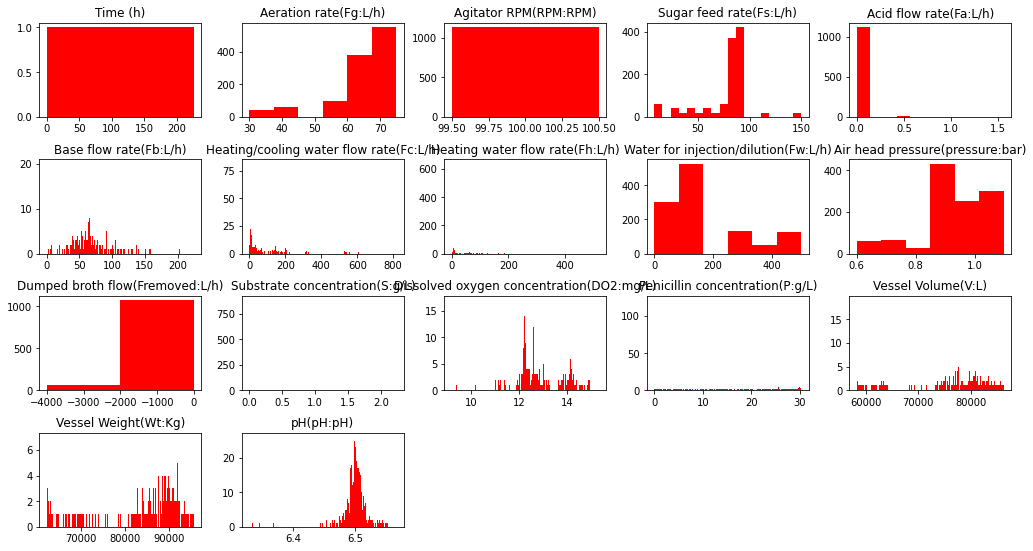

In [11]:
import matplotlib.pyplot as plt
plt.suptitle('Total variables')
from matplotlib.pyplot import figure
figure(figsize=(20, 10))
plt.subplots_adjust(left=0.225,
                    bottom=0.2, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.25, 
                    hspace=0.45)
for i in range(1,req_data.shape[1]//2):
    plt.subplot(4,5,i)
    f = plt.gca()
    f.set_title(req_data.columns.values[i-1])
    vals = np.size((req_data.iloc[1130:2260,i-1]).unique())
    plt.hist(req_data.iloc[1130:2260,i-1], bins=vals,color='red')

<Figure size 432x288 with 0 Axes>

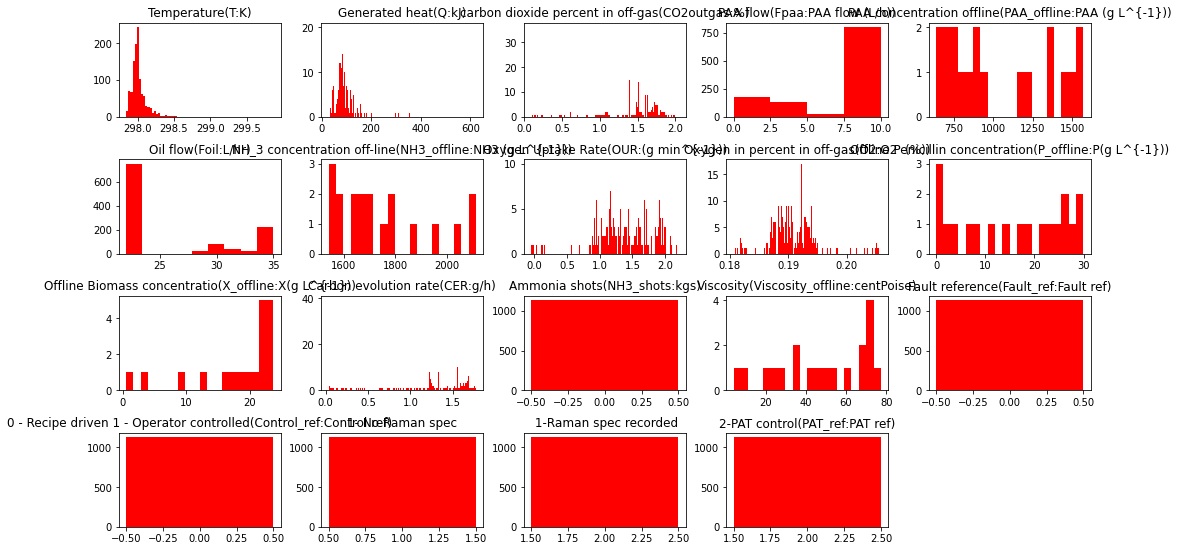

In [12]:
plt.suptitle('Total variables')
from matplotlib.pyplot import figure
figure(figsize=(20, 10))
plt.subplots_adjust(left=0.225,
                    bottom=0.2, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.25, 
                    hspace=0.45)
for i in range(req_data.shape[1]//2 , req_data.shape[1] + 1):
    plt.subplot(4,5,i-17)
    f = plt.gca()
    f.set_title(req_data.columns.values[i-1])
    vals = np.size((req_data.iloc[1130:2260,i-1]).unique())
    plt.hist(req_data.iloc[1130:2260,i-1], bins=vals,color='red')

#### Input Variables

<Figure size 432x288 with 0 Axes>

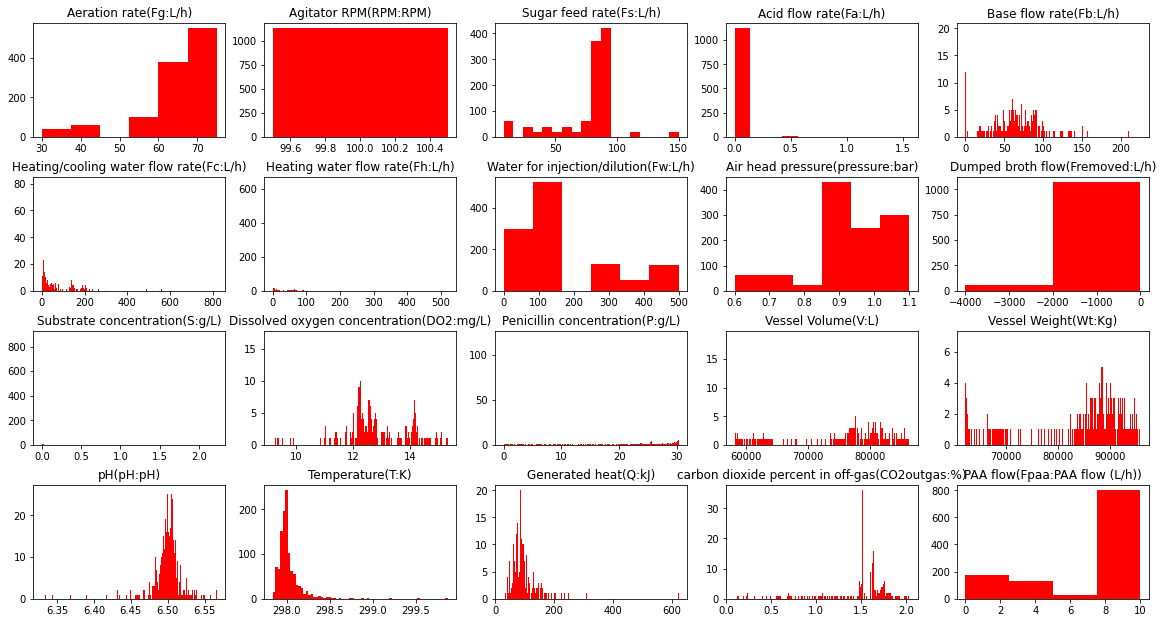

In [13]:
input = req_data.iloc[:,1:21]
plt.suptitle('Histogram of Input')
from matplotlib.pyplot import figure
figure(figsize=(20, 10))
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35)
for i in range(1,input.shape[1]+1):
    plt.subplot(4,5,i)
    f = plt.gca()
    f.set_title(input.columns.values[i-1])
    vals = np.size((input.iloc[1130:2260,i-1]).unique())
    plt.hist(input.iloc[1130:2260,i-1], bins=vals,color='red')

In [14]:
input.drop(input.iloc[:,12:19], axis = 1,inplace= True)
input

,Aeration rate(Fg:L/h),Agitator RPM(RPM:RPM),Sugar feed rate(Fs:L/h),Acid flow rate(Fa:L/h),Base flow rate(Fb:L/h),Heating/cooling water flow rate(Fc:L/h),Heating water flow rate(Fh:L/h),Water for injection/dilution(Fw:L/h),Air head pressure(pressure:bar),Dumped broth flow(Fremoved:L/h),Substrate concentration(S:g/L),Dissolved oxygen concentration(DO2:mg/L),PAA flow(Fpaa:PAA flow (L/h))
0,30,100,8,0.0000,30.1180,9.8335,0.0001,0,0.6,0,0.95749,14.711,5.0
1,30,100,8,0.0000,51.2210,18.1550,0.0001,0,0.6,0,1.00460,14.699,5.0
2,30,100,8,0.0000,54.3020,9.5982,0.0001,0,0.6,0,1.04980,14.686,5.0
3,30,100,8,0.0000,37.8160,4.3395,0.0001,0,0.6,0,1.09420,14.661,5.0
4,30,100,8,0.5181,18.9080,1.1045,0.0001,0,0.6,0,1.13700,14.633,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67555,65,100,45,0.0000,26.2920,71.3820,10.1310,250,0.9,0,18.08000,13.818,9.0
67556,65,100,45,0.0000,21.5400,37.3640,1.0131,250,0.9,0,18.15900,13.813,9.0
67557,65,100,45,0.0000,14.5700,11.2090,68.1570,250,0.9,0,18.23800,13.811,9.0
67558,65,100,45,0.0000,7.6180,41.6620,6.8157,250,0.9,0,18.31700,13.786,9.0


In [15]:
for i in range(0,13):
    print(input.iloc[:,i].describe())
    print('\n')



count    67560.000000
mean        65.320530
std         11.505737
min         30.000000
25%         60.000000
50%         65.000000
75%         75.000000
max         75.000000
Name: Aeration rate(Fg:L/h), dtype: float64


count    67560.0
mean       100.0
std          0.0
min        100.0
25%        100.0
50%        100.0
75%        100.0
max        100.0
Name: Agitator RPM(RPM:RPM), dtype: float64


count    67560.000000
mean        77.496818
std         26.319636
min          8.000000
25%         72.000000
50%         80.000000
75%         90.000000
max        150.000000
Name: Sugar feed rate(Fs:L/h), dtype: float64


count    67560.000000
mean         0.082216
std          0.577661
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          8.319400
Name: Acid flow rate(Fa:L/h), dtype: float64


count    67560.000000
mean        59.256202
std         42.955860
min          0.000000
25%         33.679000
50%         55.544000
75%         75.68

In [ ]:
time = req_data['Time (h)']
for i in range(0,13):
    sns.lineplot(x=time[1130:2260],y = input.iloc[1130:2260,i])
    plt.show(block = False)

#### Output Variables

In [17]:
output = req_data.iloc[:,21:]

In [ ]:
output.describe()

In [ ]:
plt.suptitle('Histogram of Output')
from matplotlib.pyplot import figure
figure(figsize=(20, 10))
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35)
for i in range(1,output.shape[1]+1):
    plt.subplot(4,5,i)
    f = plt.gca()
    f.set_title(output.columns.values[i-1])
    vals = np.size((output.iloc[1130:2260,i-1]).unique())
    plt.hist(output.iloc[1130:2260,i-1], bins=vals,color='red')

In [ ]:
output.drop(['Ammonia shots(NH3_shots:kgs)','Fault reference(Fault_ref:Fault ref)','0 - Recipe driven 1 - Operator controlled(Control_ref:Control ref)','1- No Raman spec',' 1-Raman spec recorded','2-PAT control(PAT_ref:PAT ref)'], axis = 1)

In [21]:
output.describe()

,PAA concentration offline(PAA_offline:PAA (g L^{-1})),Oil flow(Foil:L/hr),NH_3 concentration off-line(NH3_offline:NH3 (g L^{-1})),Oxygen Uptake Rate(OUR:(g min^{-1})),Oxygen in percent in off-gas(O2:O2 (%)),Offline Penicillin concentration(P_offline:P(g L^{-1})),Offline Biomass concentratio(X_offline:X(g L^{-1})),Carbon evolution rate(CER:g/h),Ammonia shots(NH3_shots:kgs),Viscosity(Viscosity_offline:centPoise),Fault reference(Fault_ref:Fault ref),0 - Recipe driven 1 - Operator controlled(Control_ref:Control ref),1- No Raman spec,1-Raman spec recorded,2-PAT control(PAT_ref:PAT ref)
count,1221.000000,67560.000000,1221.000000,67560.000000,67560.000000,1.221000e+03,1221.000000,67560.000000,67560.0,1221.000000,67560.0,67560.000000,67560.0,67560.000000,67560.000000
mean,2000.354758,26.335998,2003.772563,1.260942,0.191499,1.447838e+01,18.883050,1.254728,0.0,51.614558,0.0,0.491933,1.0,30.018206,30.018206
std,1613.742110,4.948188,562.829302,0.462665,0.004300,1.009750e+01,7.006339,0.483883,0.0,23.934572,0.0,0.499939,0.0,16.937804,16.937804
min,393.100000,22.000000,1391.600000,-1.029400,0.148600,1.017800e-25,0.402170,0.028917,0.0,4.075800,0.0,0.000000,1.0,1.000000,1.000000
25%,1129.200000,23.000000,1709.400000,0.984705,0.188760,5.737500e+00,16.928000,0.991405,0.0,35.004000,0.0,0.000000,1.0,16.000000,16.000000
50%,1476.000000,23.000000,1802.900000,1.273300,0.191170,1.488400e+01,21.369000,1.405200,0.0,53.363000,0.0,0.000000,1.0,30.000000,30.000000
75%,2026.600000,30.000000,1977.800000,1.601500,0.193890,2.254600e+01,23.760000,1.627300,0.0,73.722000,0.0,1.000000,1.0,45.000000,45.000000
max,11524.000000,35.000000,5170.000000,6.761100,0.223760,3.618000e+01,27.882000,2.028500,0.0,91.962000,0.0,1.000000,1.0,59.000000,59.000000


In [22]:
idx = []
for i in range(45225):
  if pd.isnull(output.iloc[i,5]):
    continue
  else:
    idx.append(i)

In [23]:
x = input.iloc[idx,:]

In [24]:
y = output.iloc[idx,5]

#### Model Building

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_s = pd.DataFrame(sc.fit_transform(x_train))
x_test_s = pd.DataFrame(sc.transform(x_test))
x_train_s.columns = x_train.columns.values
x_test_s.columns = x_test.columns.values

#### Applying PCA

In [27]:
from sklearn.decomposition import PCA

In [28]:
pca = PCA(n_components=9).fit(x_train_s)

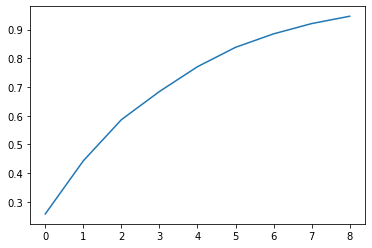

In [29]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

In [30]:
x_train_pca = pca.transform(x_train_s)
x_test_pca = pca.transform(x_test_s)

#### Model Training

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
clf = LinearRegression()
clf = clf.fit(x_train_pca, y_train)
y_pred = clf.predict(x_test_pca)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

lin_regressor=LinearRegression()
mse=cross_val_score(lin_regressor,x_train_pca,y_train,scoring='neg_mean_squared_error',cv=5)
mean_mse=np.mean(mse)
print(mean_mse)

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(x_train_pca,y_train)

In [ ]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(x_train_pca,y_train)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

In [37]:
predict_l = lasso_regressor.predict(x_test_pca)
predict_r = ridge_regressor.predict(x_test_pca)

In [ ]:
r2_score(y_test, predict_l)

In [ ]:
r2_score(y_test, predict_r)